# 「バス・トイレ」特徴量を抽出する！

In [1]:
import pandas as pd
import torch
import transformers
from transformers import BertTokenizer, BertJapaneseTokenizer
import re
import requests
import unicodedata
import nltk
from nltk.corpus import wordnet
from bs4 import BeautifulSoup
nltk.download(['wordnet', 'stopwords', 'punkt'])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/koshidatatsuo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/koshidatatsuo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/koshidatatsuo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
train_df = pd.read_csv("../data/outer_data/train.csv")
test_df = pd.read_csv('../data/outer_data/test.csv')

### テキスト整形用関数群

In [3]:
def clean_text(text):
    replaced_text = text.lower()
    replaced_text = re.sub(r'[【】]', ' ', replaced_text)       # 【】の除去
    replaced_text = re.sub(r'[（）()]', ' ', replaced_text)     # （）の除去
    replaced_text = re.sub(r'[［］\[\]]', ' ', replaced_text)   # ［］の除去
    replaced_text = re.sub(r'[『』]', ' ', replaced_text)   # 『』の除去
    replaced_text = re.sub(r'[@＠]\w+', '', replaced_text)  # メンションの除去
    replaced_text = re.sub(r'https?:\/\/.*?[\r\n ]', '', replaced_text)  # URLの除去
    replaced_text = re.sub(r'　', ' ', replaced_text)  # 全角空白の除去
    replaced_text = re.sub(r' ', '', replaced_text)  # 空白の除去
    return replaced_text


def clean_html_tags(html_text):
    soup = BeautifulSoup(html_text, 'html.parser')
    cleaned_text = soup.get_text()
    cleaned_text = ''.join(cleaned_text.splitlines())
    return cleaned_text


def clean_html_and_js_tags(html_text):
    soup = BeautifulSoup(html_text, 'html.parser')
    [x.extract() for x in soup.findAll(['script', 'style'])]
    cleaned_text = soup.get_text()
    cleaned_text = ''.join(cleaned_text.splitlines())
    return cleaned_text


def clean_url(html_text):
    cleaned_text = re.sub(r'http\S+', '', html_text)
    return cleaned_text


def normalize(text):
    normalized_text = normalize_unicode(text)
    normalized_text = normalize_number(normalized_text)
    normalized_text = lower_text(normalized_text)
    return normalized_text


def lower_text(text):
    return text.lower()


def normalize_unicode(text, form='NFKC'):
    normalized_text = unicodedata.normalize(form, text)
    return normalized_text


def normalize_number(text):
    replaced_text = re.sub(r'\d+', '0', text)
    return replaced_text


def text_cleaning(text):
    text = clean_text(text)
    text = clean_html_tags(text)
    text = clean_html_and_js_tags(text)
    text = clean_url(text)
    text = normalize(text)
    text = lower_text(text)
    text = normalize_unicode(text)

    return text

In [41]:
bath_toilet = train_df['バス・トイレ']

In [42]:
for i in range(len(bath_toilet)):
    try:
        bath_toilet.loc[i] = clean_text(bath_toilet.loc[i])
        bath_toilet.loc[i] = bath_toilet.loc[i].replace('／', '')
        bath_toilet.loc[i] = bath_toilet.loc[i].replace('\t', ' ')
    except:
        pass

/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_8389/1349375585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath_toilet.loc[i] = clean_text(bath_toilet.loc[i])
/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_8389/1349375585.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath_toilet.loc[i] = bath_toilet.loc[i].replace('／', '')
/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_8389/1349375585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [43]:
bath_toilet[30]

'専用バス専用トイレバス・トイレ別シャワー追焚機能浴室乾燥機温水洗浄便座洗面台独立'

In [44]:
from cmath import nan


bath_toilet_points = []
for i in range(len(bath_toilet)):
    text = bath_toilet.loc[i]
    bath_toilet_point = []
    try:
        if '専用バス' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)
        
        if 'バス・トイレ別' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if '専用トイレ' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if 'シャワー' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if '浴室乾燥機' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if '温水洗浄便座' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if '洗面台独立' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if '脱衣所' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if '追焚機能' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

    except:#「バス・トイレ」特徴量に何も記載がない場合
        bath_toilet_point = [0 for k in range(9)] #ホントに0埋めで良いの？

    bath_toilet_points.append( bath_toilet_point )

bath_toilet_points = pd.DataFrame( bath_toilet_points )

In [45]:
bath_toilet_points.columns = ['専用バス','バス・トイレ別','シャワー','専用トイレ','浴室乾燥機','温水洗浄便座',
'洗面台独立','脱衣所','追焚機能']

In [46]:
bath_toilet_points.to_csv('../data/handmade_data/bath_toilet_points.csv',index=False)

テストデータについても同様の処理を行う

In [47]:
bath_toilet = test_df['バス・トイレ']

In [48]:
for i in range(len(bath_toilet)):
    try:
        bath_toilet.loc[i] = clean_text(bath_toilet.loc[i])
        bath_toilet.loc[i] = bath_toilet.loc[i].replace('／', '')
        bath_toilet.loc[i] = bath_toilet.loc[i].replace('\t', ' ')
    except:
        pass

/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_8389/1349375585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath_toilet.loc[i] = clean_text(bath_toilet.loc[i])
/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_8389/1349375585.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath_toilet.loc[i] = bath_toilet.loc[i].replace('／', '')
/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_8389/1349375585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [49]:
from cmath import nan


bath_toilet_points = []
for i in range(len(bath_toilet)):
    text = bath_toilet.loc[i]
    bath_toilet_point = []
    try:
        if '専用バス' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)
        
        if 'バス・トイレ別' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if '専用トイレ' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if 'シャワー' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if '浴室乾燥機' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if '温水洗浄便座' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if '洗面台独立' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if '脱衣所' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

        if '追焚機能' in text:
            bath_toilet_point.append(1)
        else:
            bath_toilet_point.append(0)

    except:#「バス・トイレ」特徴量に何も記載がない場合
        bath_toilet_point = [0 for k in range(9)] #ホントに0埋めで良いの？

    bath_toilet_points.append( bath_toilet_point )

bath_toilet_points = pd.DataFrame( bath_toilet_points )

In [50]:
bath_toilet_points.columns = ['専用バス','バス・トイレ別','シャワー','専用トイレ','浴室乾燥機','温水洗浄便座',
'洗面台独立','脱衣所','追焚機能']

In [51]:
bath_toilet_points.to_csv('../data/test_data/test_bath_toilet_points.csv',index=False)

### 作った特徴量でLightGBMのGBDTに突っ込んでみる！

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
equipments = pd.read_csv('../data/handmade_data/equipments.csv')
bath_toilet_points = pd.read_csv('../data/handmade_data/bath_toilet_points.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')
test_bath_toilet_points = pd.read_csv('../data/test_data/test_bath_toilet_points.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, 
                    stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], 
                    buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms, 
                    bath_toilet_points], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, 
                    test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],
                    test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms,
                    test_bath_toilet_points], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満', 
                    '専用バス','バス・トイレ別','シャワー','専用トイレ','浴室乾燥機','温水洗浄便座',
                    '洗面台独立','脱衣所','追焚機能'
                    ]

Duplicate key in file PosixPath('/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')


Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2717
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48845.2	valid_1's rmse: 50204


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'シャワー', 'バス・トイレ別', 'バス・トイレ別', '定期借家', '専用トイレ', '専用バス', '建物構造', '所在地', '最寄り駅', '洗面台独立', '浴室乾燥機', '温水洗浄便座', '脱衣所', '追焚機能']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be

[20]	training's rmse: 34533.7	valid_1's rmse: 37930.7
[30]	training's rmse: 26094.5	valid_1's rmse: 31116.2
[40]	training's rmse: 21070.4	valid_1's rmse: 27270.2
[50]	training's rmse: 17884.5	valid_1's rmse: 24935.9
[60]	training's rmse: 15863.5	valid_1's rmse: 23470.3
[70]	training's rmse: 14477.4	valid_1's rmse: 22481.3
[80]	training's rmse: 13483.8	valid_1's rmse: 21786.7
[90]	training's rmse: 12702.6	valid_1's rmse: 21244.6
[100]	training's rmse: 12026.8	valid_1's rmse: 20808
[110]	training's rmse: 11527.5	valid_1's rmse: 20483.6
[120]	training's rmse: 11068.8	valid_1's rmse: 20161.6
[130]	training's rmse: 10662.8	valid_1's rmse: 19891.9
[140]	training's rmse: 10314.1	valid_1's rmse: 19649.4
[150]	training's rmse: 9961.49	valid_1's rmse: 19422.7
[160]	training's rmse: 9650.8	valid_1's rmse: 19220.6
[170]	training's rmse: 9389.74	valid_1's rmse: 19029.1
[180]	training's rmse: 9140.05	valid_1's rmse: 18855.9
[190]	training's rmse: 8909.31	valid_1's rmse: 18680.8
[200]	training's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'シャワー', 'バス・トイレ別', 'バス・トイレ別', '定期借家', '専用トイレ', '専用バス', '建物構造', '所在地', '最寄り駅', '洗面台独立', '浴室乾燥機', '温水洗浄便座', '脱衣所', '追焚機能']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be

[30]	training's rmse: 26781.7	valid_1's rmse: 28015.3
[40]	training's rmse: 22061.2	valid_1's rmse: 23804.9
[50]	training's rmse: 19108.4	valid_1's rmse: 21179.5
[60]	training's rmse: 17293.2	valid_1's rmse: 19691.1
[70]	training's rmse: 15960	valid_1's rmse: 18945.3
[80]	training's rmse: 14949.3	valid_1's rmse: 18353.5
[90]	training's rmse: 14149.2	valid_1's rmse: 18042.8
[100]	training's rmse: 13498.4	valid_1's rmse: 17838.3
[110]	training's rmse: 12957.1	valid_1's rmse: 17666.8
[120]	training's rmse: 12468.6	valid_1's rmse: 17613.6
[130]	training's rmse: 12035.6	valid_1's rmse: 17490.3
[140]	training's rmse: 11633.9	valid_1's rmse: 17463.9
[150]	training's rmse: 11261.1	valid_1's rmse: 17461.4
[160]	training's rmse: 10909.8	valid_1's rmse: 17449.5
Early stopping, best iteration is:
[156]	training's rmse: 11049.1	valid_1's rmse: 17426.1
Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001776 seconds.
You can set `force_row_w

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'シャワー', 'バス・トイレ別', 'バス・トイレ別', '定期借家', '専用トイレ', '専用バス', '建物構造', '所在地', '最寄り駅', '洗面台独立', '浴室乾燥機', '温水洗浄便座', '脱衣所', '追焚機能']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be

[10]	training's rmse: 48922.5	valid_1's rmse: 48907.9
[20]	training's rmse: 35093.7	valid_1's rmse: 34752.2
[30]	training's rmse: 26884.8	valid_1's rmse: 27123.7
[40]	training's rmse: 22144.2	valid_1's rmse: 23006.8
[50]	training's rmse: 19117.9	valid_1's rmse: 20555.9
[60]	training's rmse: 17215.7	valid_1's rmse: 19347.2
[70]	training's rmse: 15870.5	valid_1's rmse: 18684.1
[80]	training's rmse: 14841.6	valid_1's rmse: 18231.6
[90]	training's rmse: 14026.1	valid_1's rmse: 18035.4
[100]	training's rmse: 13401.2	valid_1's rmse: 17856.8
[110]	training's rmse: 12883.2	valid_1's rmse: 17683.9
[120]	training's rmse: 12384.6	valid_1's rmse: 17542.7
[130]	training's rmse: 11928.4	valid_1's rmse: 17403.7
[140]	training's rmse: 11512.9	valid_1's rmse: 17281.2
[150]	training's rmse: 11161.3	valid_1's rmse: 17202.3
[160]	training's rmse: 10833.7	valid_1's rmse: 17129.3
[170]	training's rmse: 10511.1	valid_1's rmse: 17079.9
[180]	training's rmse: 10242.3	valid_1's rmse: 17035.5
[190]	training's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'シャワー', 'バス・トイレ別', 'バス・トイレ別', '定期借家', '専用トイレ', '専用バス', '建物構造', '所在地', '最寄り駅', '洗面台独立', '浴室乾燥機', '温水洗浄便座', '脱衣所', '追焚機能']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2715
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49021.5	valid_1's rmse: 48009.5
[20]	training's rmse: 34799.6	valid_1's rmse: 35771.6
[30]	training's rmse: 26341.3	valid_1's rmse: 28832.2
[40]	training's rmse: 21430.5	valid_1's rmse: 25192.5
[50]	training's rmse: 18426.3	valid_1's rmse: 23331.4
[60]	training's rmse: 16596	valid_1's rmse: 22370.8
[70]	training's rmse: 15349	valid_1's rmse: 21865.8
[80]	training's rmse: 14447.7	valid_1's rmse: 21425.6
[90]	training's rmse: 13705	valid_1's rmse: 21064
[100]	training's rmse: 13117.3	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'シャワー', 'バス・トイレ別', 'バス・トイレ別', '定期借家', '専用トイレ', '専用バス', '建物構造', '所在地', '最寄り駅', '洗面台独立', '浴室乾燥機', '温水洗浄便座', '脱衣所', '追焚機能']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be

[20]	training's rmse: 35157.7	valid_1's rmse: 37203.1
[30]	training's rmse: 27017.2	valid_1's rmse: 28766.3
[40]	training's rmse: 22384	valid_1's rmse: 23799.9
[50]	training's rmse: 19237.5	valid_1's rmse: 20940.9
[60]	training's rmse: 17268	valid_1's rmse: 19418.4
[70]	training's rmse: 15945.3	valid_1's rmse: 18436.8
[80]	training's rmse: 14934.2	valid_1's rmse: 17860
[90]	training's rmse: 14164.2	valid_1's rmse: 17461.5
[100]	training's rmse: 13596.6	valid_1's rmse: 17153.8
[110]	training's rmse: 13095.6	valid_1's rmse: 16989.6
[120]	training's rmse: 12683.1	valid_1's rmse: 16793.3
[130]	training's rmse: 12204.1	valid_1's rmse: 16655.1
[140]	training's rmse: 11830.7	valid_1's rmse: 16514.4
[150]	training's rmse: 11489.4	valid_1's rmse: 16394
[160]	training's rmse: 11159.8	valid_1's rmse: 16311.6
[170]	training's rmse: 10866.7	valid_1's rmse: 16216.3
[180]	training's rmse: 10595.1	valid_1's rmse: 16125.4
[190]	training's rmse: 10353.7	valid_1's rmse: 16033
[200]	training's rmse: 10124

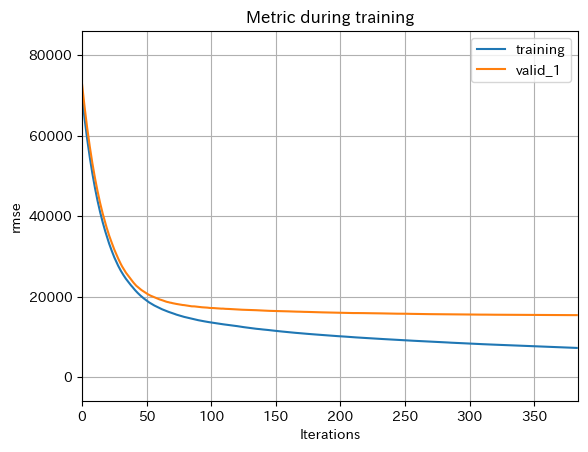

,importance
面積,4.466143e+14
L,3.946076e+14
平均地価,1.987214e+14
最寄り駅,9.545112e+13
築年数,6.248636e+13
所在地,3.739870e+13
全体の階数,2.967152e+13
一部屋あたりの面積,2.548295e+13
契約期間,1.429720e+13
洗面台独立,1.255075e+13


In [2]:
n_split = 5
cv = KFold(n_splits=n_split, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GBDT = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

    params = {
        'objective':'regression',
        'boosting_type':'gbdt',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda':  5.009615137983937e-06,
        'max_bin': 346,
        'num_leaves': 91,
    }

    print('Start training...')
    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

In [58]:
df_importance.head(60)

,importance
面積,4.521776e+14
L,3.828089e+14
平均地価,1.978919e+14
最寄り駅,9.704358e+13
築年数,5.872925e+13
所在地,3.640039e+13
一部屋あたりの面積,2.612381e+13
全体の階数,2.097326e+13
契約期間,1.362483e+13
洗面台独立,1.322789e+13
